In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
dfm = pd.read_csv('Predict_YaleM2_mmww.csv')
dfw = pd.read_csv('RosterLinkedIn_YaleM2.csv')

In [3]:
dfm.set_index('FirstLast', drop=False, inplace=True)
dfw.set_index('FirstLast', drop=False, inplace=True)

In [4]:
#Adding a sequential number if index is duplicated. There could be several people with same name.
dfw.index = dfw.index + dfw.groupby(level=0).cumcount().astype(str).replace('0','')
dfm.index = dfm.index + dfm.groupby(level=0).cumcount().astype(str).replace('0','')

In [5]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, Victor KIAM to Alan Sou
Data columns (total 33 columns):
FirstLast         425 non-null object
Criteria          425 non-null object
Year              425 non-null float64
YearsPlayed       425 non-null float64
RosterLink        40 non-null object
Hometown          40 non-null object
HS                37 non-null object
ClassYear         40 non-null object
College           425 non-null object
First             425 non-null object
Gender            425 non-null int64
Last              425 non-null object
MidInit           0 non-null float64
MidName           0 non-null float64
Name              40 non-null object
RosterYear        40 non-null object
LName             363 non-null object
SearchResult      363 non-null object
Headline          363 non-null object
Location          363 non-null object
Company           351 non-null object
School            363 non-null object
Activites         363 non-null object
fuzz_ratio        

In [6]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, Victor KIAM to Alan Sou
Data columns (total 33 columns):
FirstLast         425 non-null object
Criteria          425 non-null object
Year              425 non-null float64
YearsPlayed       425 non-null float64
RosterLink        40 non-null object
Hometown          40 non-null object
HS                37 non-null object
ClassYear         40 non-null object
College           425 non-null object
First             425 non-null object
Gender            425 non-null int64
Last              425 non-null object
MidInit           0 non-null float64
MidName           0 non-null float64
Name              40 non-null object
RosterYear        40 non-null object
LName             363 non-null object
SearchResult      363 non-null object
Headline          363 non-null object
Location          363 non-null object
Company           351 non-null object
School            363 non-null object
Activites         363 non-null object
fuzz_ratio        

In [89]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, Victor KIAM to Alan Sou
Data columns (total 15 columns):
FirstLast         353 non-null object
Year              353 non-null float64
YearsPlayed       353 non-null float64
Gender            353 non-null int64
fuzz_ratio        353 non-null float64
fuzz_pratio       353 non-null float64
fuzz_tokensort    353 non-null float64
fuzz_tokenset     353 non-null float64
fuzz_wratio       353 non-null float64
tennis_yn         353 non-null float64
School_yn         353 non-null float64
SameName_yn       353 non-null float64
SameTennis_yn     353 non-null float64
Decade            353 non-null float64
prediction        353 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 44.1+ KB


In [90]:
dfw['prediction'] = dfm['prediction']

In [91]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [92]:
dfw['prediction'].value_counts()

0.0    253
1.0    100
Name: prediction, dtype: int64

In [93]:
#dfpp = dfm[['FirstLast', 'Year']]

In [94]:
#dfmerge = pd.merge(dfw, dfpp,
#                     left_on='Name_L', right_on='FirstLast', how='right',suffixes=('_dfw','_dfm'))

In [95]:
#dfmerge.info()

In [96]:
#dfw = dfmerge

In [97]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, Victor KIAM to Alan Sou
Data columns (total 34 columns):
FirstLast         425 non-null object
Criteria          425 non-null object
Year              425 non-null float64
YearsPlayed       425 non-null float64
RosterLink        40 non-null object
Hometown          40 non-null object
HS                37 non-null object
ClassYear         40 non-null object
College           425 non-null object
First             425 non-null object
Gender            425 non-null int64
Last              425 non-null object
MidInit           0 non-null float64
MidName           0 non-null float64
Name              40 non-null object
RosterYear        40 non-null object
LName             363 non-null object
SearchResult      363 non-null object
Headline          363 non-null object
Location          363 non-null object
Company           351 non-null object
School            363 non-null object
Activites         363 non-null object
fuzz_ratio        

C:\Users\19145\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


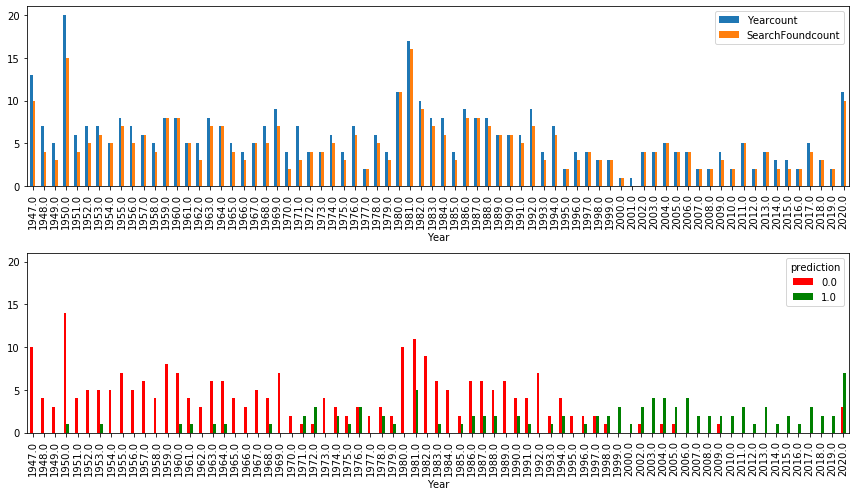

In [99]:
fig, (ax1, ax2)\
= plt.subplots(nrows=2, ncols=1, figsize=(12,7), sharey=True)


dfwf = dfw[dfw['Gender'] == 1]
yeargroup = dfwf.groupby(['Year']).agg(Year=pd.NamedAgg(column='Year', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Year', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroup.plot.bar('Year', ax=ax1)

taby = pd.crosstab(dfwf['Year'] , dfwf['prediction'])
taby.plot(kind='bar', ax=ax2, colors='rg')
fig.tight_layout()
plt.show()

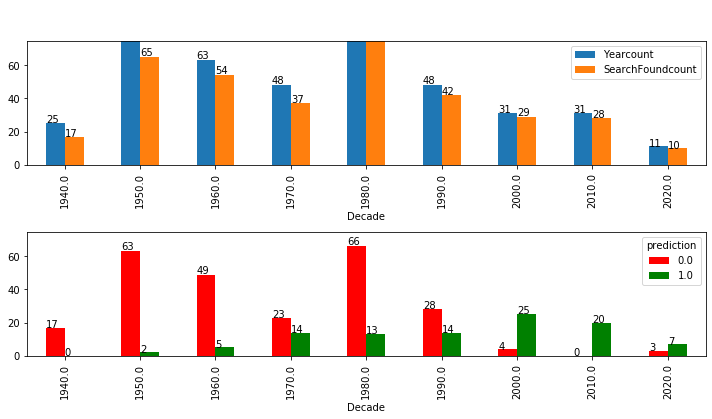

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharey=True)


dfwf = dfw[dfw['Gender'] == 1]
yeargroup = dfwf.groupby(['Decade']).agg(Decade=pd.NamedAgg(column='Decade', aggfunc='first'),
                                      Yearcount = pd.NamedAgg(column='Decade', aggfunc='count'),
                                      SearchFoundcount = pd.NamedAgg(column='SearchResult', aggfunc='count')
                                      )
yeargroup.plot.bar('Decade', ax=ax1)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.0002))


taby = pd.crosstab(dfwf['Decade'] , dfwf['prediction'])
taby.plot(kind='bar', ax=ax2, colors='rg')
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.0002))
    ax2.set_ylim(0,75)


fig.tight_layout()
plt.show()

Text(0.5, 0, 'Predict Non-Match=0, Predict Match=1')

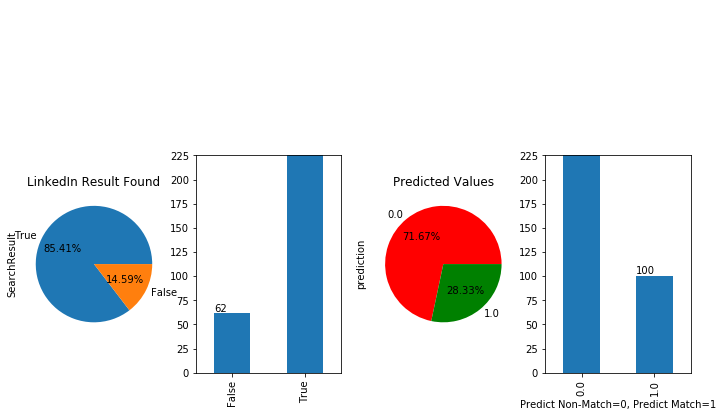

In [101]:
fig, (ax1, ax2, ax3, ax4)\
= plt.subplots(nrows=1, ncols=4, figsize=(12,4))

ax1.set_title("LinkedIn Result Found")
dfw_bool = dfw.notnull()
dfw_bool['SearchResult'].value_counts().plot.pie(autopct='%.2f%%', ax=ax1)
dfw_bool['SearchResult'].value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,225)

ax3.set_title("Predicted Values")
dfw[dfw['prediction'].notnull()].prediction.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw[dfw['prediction'].notnull()].prediction.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,225)
plt.xlabel('Predict Non-Match=0, Predict Match=1')



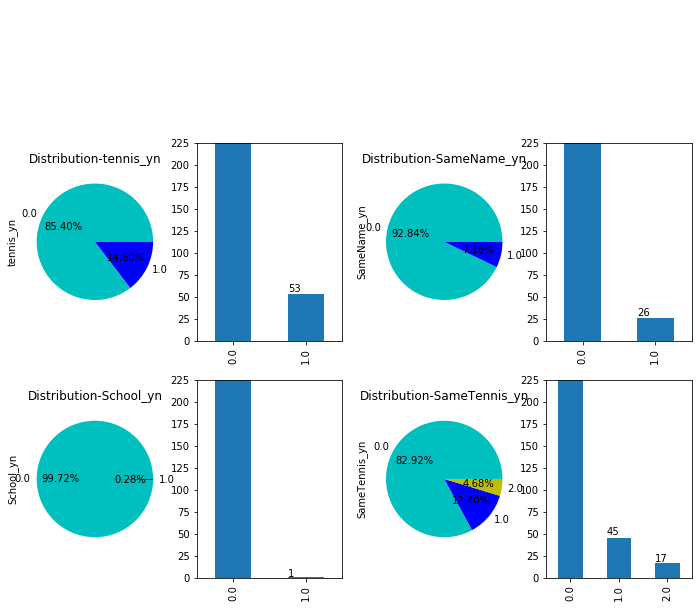

In [102]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))\
= plt.subplots(nrows=2, ncols=4, figsize=(12,8))

ax1.set_title("Distribution-tennis_yn")
dfw.tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='cb')
dfw.tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.05))
    ax2.set_ylim(0,225)

ax3.set_title("Distribution-SameName_yn")
dfw.SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='cb')
dfw.SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))
    ax4.set_ylim(0,225)

ax5.set_title("Distribution-School_yn")
dfw.School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='cb')
dfw.School_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,225)
    
ax7.set_title("Distribution-SameTennis_yn")
dfw.SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='cby')
dfw.SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))
    ax8.set_ylim(0,225)

    
plt.show()


Text(0.5, 0, 'Predict Non-Match=0, Predict Match=1')

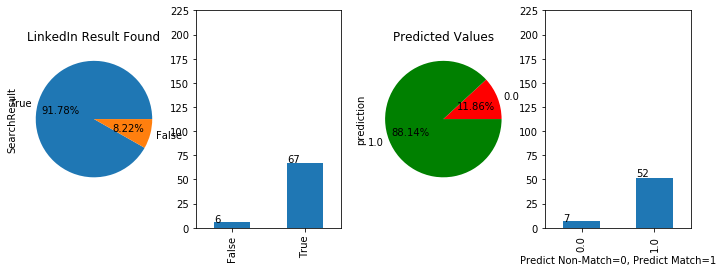

In [103]:
fig, (ax1, ax2, ax3, ax4)\
= plt.subplots(nrows=1, ncols=4, figsize=(12,4))

dfw2k = dfw[dfw['Year'] >= 2000]

ax1.set_title("LinkedIn Result Found")
dfw_bool = dfw2k.notnull()
dfw_bool['SearchResult'].value_counts().plot.pie(autopct='%.2f%%', ax=ax1)
dfw_bool['SearchResult'].value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,225)

ax3.set_title("Predicted Values")
dfw2k[dfw2k['prediction'].notnull()].prediction.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='rg')
dfw2k[dfw2k['prediction'].notnull()].prediction.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,225)
plt.xlabel('Predict Non-Match=0, Predict Match=1')



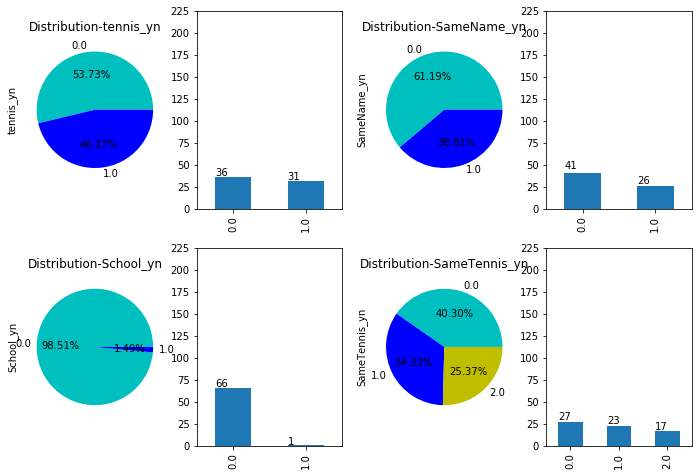

In [104]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))\
= plt.subplots(nrows=2, ncols=4, figsize=(12,8))


dfw2k = dfw[dfw['Year'] >= 2000]

ax1.set_title("Distribution-tennis_yn")
dfw2k.tennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax1, colors='cb')
dfw2k.tennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax2)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.05))
    ax2.set_ylim(0,225)

ax3.set_title("Distribution-SameName_yn")
dfw2k.SameName_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax3, colors='cb')
dfw2k.SameName_yn.value_counts().sort_index().plot(kind='bar', ax=ax4)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))
    ax4.set_ylim(0,225)

ax5.set_title("Distribution-School_yn")
dfw2k.School_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax5, colors='cb')
dfw2k.School_yn.value_counts().sort_index().plot(kind='bar', ax=ax6)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,225)
    
ax7.set_title("Distribution-SameTennis_yn")
dfw2k.SameTennis_yn.value_counts().sort_index().plot.pie(autopct='%.2f%%', ax=ax7, colors='cby')
dfw2k.SameTennis_yn.value_counts().sort_index().plot(kind='bar', ax=ax8)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))
    ax8.set_ylim(0,225)

    
plt.show()
